In [1]:
%matplotlib inline

In [16]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)

train_data = pd.read_csv("train.csv", sep=",", encoding='cp1252')
test_data = pd.read_csv("test.csv", sep=",", encoding='cp1252')

latlong_data = pd.read_csv("latlons.csv", sep=",", encoding='cp1252')
addresses_data = pd.read_csv("addresses.csv", sep=",", encoding='cp1252')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Eyeball the data

In [17]:
# step 2 - eyeball the data
train_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,48208,NaN,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,MI,48223,NaN,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,MI,48214,NaN,USA,2004-04-26 13:30:00,NaN,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,MI,48206,NaN,USA,2004-04-26 13:00:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [18]:
latlong_data.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


In [19]:
addresses_data.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [20]:
test_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,MI,48213,NaN,USA,2012-01-04 14:00:00,2012-01-19 09:00:00,22-2-61,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,MI,48219,NaN,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,MI,48219,NaN,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-43,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,MI,48183,NaN,USA,2012-01-05 10:25:00,2012-02-07 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,MI,48154,NaN,USA,2012-01-05 10:20:00,2012-02-14 09:00:00,22-2-45,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

# SIDEBAR: Set aside "test" set

In [22]:
from sklearn.model_selection import train_test_split

train_data = train_data.set_index('ticket_id')

y_train_data = train_data['compliance'].astype('str')
X_train_data = train_data.drop(['compliance'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, random_state=0)

# use the test set to evaluate and troubleshoot the model after tuning parameters via cross-validation

# Clean the input data (apply to test set also, once complete)

In [23]:
# remove all columns that won't be available in the test set to minimize data leakage
train_set = X_train.drop(['payment_amount','payment_date','payment_status','balance_due','collection_status','compliance_detail'], axis = 1)

In [24]:
train_set.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
ticket_id,,,,,,,,,,,,,,,,,,,,,,,,,,
31321,"Buildings, Safety Engineering & Env Department","Legge, Gerald","BARDILL, STEPHEN",19310.0,STRASBURG,NaN,3.0,PO BOX,WARREN,MI,48090,NaN,USA,2005-05-02 11:00:00,2005-06-09 13:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Determination,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN
77409,"Buildings, Safety Engineering & Env Department","Morris, John","GALLOWAY, EMMA",9130.0,WINTHROP,NaN,19126.0,SUNNY BROOK AVE.,SOUTHFIELD,MI,48076,NaN,USA,2006-05-25 10:45:00,2006-07-12 09:00:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN
248677,Department of Public Works,"May, Tanya","McCOY, DONALD E",16517.0,MEYERS RD,NaN,14877.0,GREENVIEW,DET,MI,48223,NaN,USA,2010-04-06 14:00:00,2010-05-26 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
280333,Department of Public Works,"Talbert, Reginald","COMMUNITY SOCIAL SERVICES INC, CASS",11700.0,WOODROW WILSON,NaN,1185.0,WOODDROW WILSON,DETROIT,MI,48206,NaN,USA,2011-09-13 10:15:00,2011-10-07 13:30:00,22-2-61,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
181589,"Buildings, Safety Engineering & Env Department","Russ, Kenneth","ASKER, ESAM",5767.0,MARYLAND,NaN,765.0,MUERDALE A,W. BLOOMFIELD,MI,48322,NaN,USA,2008-07-22 09:30:00,2008-09-24 15:00:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [25]:
#Change dtypes to string for cleaning: 

correct_dtypes =  {'agency_name': 'str',
                   'violation_street_number':'str',
                   'mailing_address_str_number':'str',
                   'inspector_name': 'str',
                   'violation_zip_code': 'str',
                   'city': 'str',
                   'state':'str',
                   'country':'str',
                   'zip_code': 'str',
                   'ticket_issued_date':'datetime64',
                   'hearing_date':'datetime64'}



for column, dtype in correct_dtypes.items():
    train_set[column] = train_set[column].astype(dtype)


#Cols to drop because data is not informative: 

train_set = train_set.drop(['grafitti_status','non_us_str_code','clean_up_cost', 'violation_zip_code'], axis=1)

In [27]:
# clean up string data
# set text to lowercase

for col in train_set: 
    if (train_set[col].dtype == 'object'):
        train_set[col] = train_set[col].str.lower()
        train_set[col] = train_set[col].str.replace("\.0","")

train_set.head()

/var/folders/g6/f3k4_8hx0zj8db9mvxdvf4180000gn/T/ipykernel_35962/1672137315.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set[col] = train_set[col].str.replace("\.0","")


,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,judgment_amount
ticket_id,,,,,,,,,,,,,,,,,,,,,,
31321,"buildings, safety engineering & env department","legge, gerald","bardill, stephen",19310,strasburg,3,po box,warren,mi,48090,usa,2005-05-02 11:00:00,2005-06-09 13:30:00,9-1-36(a),failure of owner to obtain certificate of comp...,responsible by determination,250.0,20.0,10.0,25.0,0.0,305.0
77409,"buildings, safety engineering & env department","morris, john","galloway, emma",9130,winthrop,19126,sunny brook ave.,southfield,mi,48076,usa,2006-05-25 10:45:00,2006-07-12 09:00:00,9-1-36(a),failure of owner to obtain certificate of comp...,responsible by default,250.0,20.0,10.0,25.0,0.0,305.0
248677,department of public works,"may, tanya","mccoy, donald e",16517,meyers rd,14877,greenview,det,mi,48223,usa,2010-04-06 14:00:00,2010-05-26 09:00:00,22-2-88(b),allowing bulk solid waste to lie or accumulate...,responsible by default,200.0,20.0,10.0,20.0,0.0,250.0
280333,department of public works,"talbert, reginald","community social services inc, cass",11700,woodrow wilson,1185,wooddrow wilson,detroit,mi,48206,usa,2011-09-13 10:15:00,2011-10-07 13:30:00,22-2-61,failure to secure city or private solid waste ...,responsible by default,200.0,20.0,10.0,20.0,0.0,250.0
181589,"buildings, safety engineering & env department","russ, kenneth","asker, esam",5767,maryland,765,muerdale a,w. bloomfield,mi,48322,usa,2008-07-22 09:30:00,2008-09-24 15:00:00,9-1-36(a),failure of owner to obtain certificate of comp...,not responsible by city dismissal,250.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# set categories
#Change dtypes to categories for cleaning: 

correct_dtypes =  {'agency_name': 'category',
                   'inspector_name': 'category',
                   'city': 'category',
                   'state':'category',
                   'country':'category',
                   'zip_code': 'category'}



for column, dtype in correct_dtypes.items():
    train_set[column] = train_set[column].astype(dtype)

train_set.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,judgment_amount
ticket_id,,,,,,,,,,,,,,,,,,,,,,
31321,"buildings, safety engineering & env department","legge, gerald","bardill, stephen",19310,strasburg,3,po box,warren,mi,48090,usa,2005-05-02 11:00:00,2005-06-09 13:30:00,9-1-36(a),failure of owner to obtain certificate of comp...,responsible by determination,250.0,20.0,10.0,25.0,0.0,305.0
77409,"buildings, safety engineering & env department","morris, john","galloway, emma",9130,winthrop,19126,sunny brook ave.,southfield,mi,48076,usa,2006-05-25 10:45:00,2006-07-12 09:00:00,9-1-36(a),failure of owner to obtain certificate of comp...,responsible by default,250.0,20.0,10.0,25.0,0.0,305.0
248677,department of public works,"may, tanya","mccoy, donald e",16517,meyers rd,14877,greenview,det,mi,48223,usa,2010-04-06 14:00:00,2010-05-26 09:00:00,22-2-88(b),allowing bulk solid waste to lie or accumulate...,responsible by default,200.0,20.0,10.0,20.0,0.0,250.0
280333,department of public works,"talbert, reginald","community social services inc, cass",11700,woodrow wilson,1185,wooddrow wilson,detroit,mi,48206,usa,2011-09-13 10:15:00,2011-10-07 13:30:00,22-2-61,failure to secure city or private solid waste ...,responsible by default,200.0,20.0,10.0,20.0,0.0,250.0
181589,"buildings, safety engineering & env department","russ, kenneth","asker, esam",5767,maryland,765,muerdale a,w. bloomfield,mi,48322,usa,2008-07-22 09:30:00,2008-09-24 15:00:00,9-1-36(a),failure of owner to obtain certificate of comp...,not responsible by city dismissal,250.0,0.0,0.0,0.0,0.0,0.0


# Explore the data


In [33]:
# histogram visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

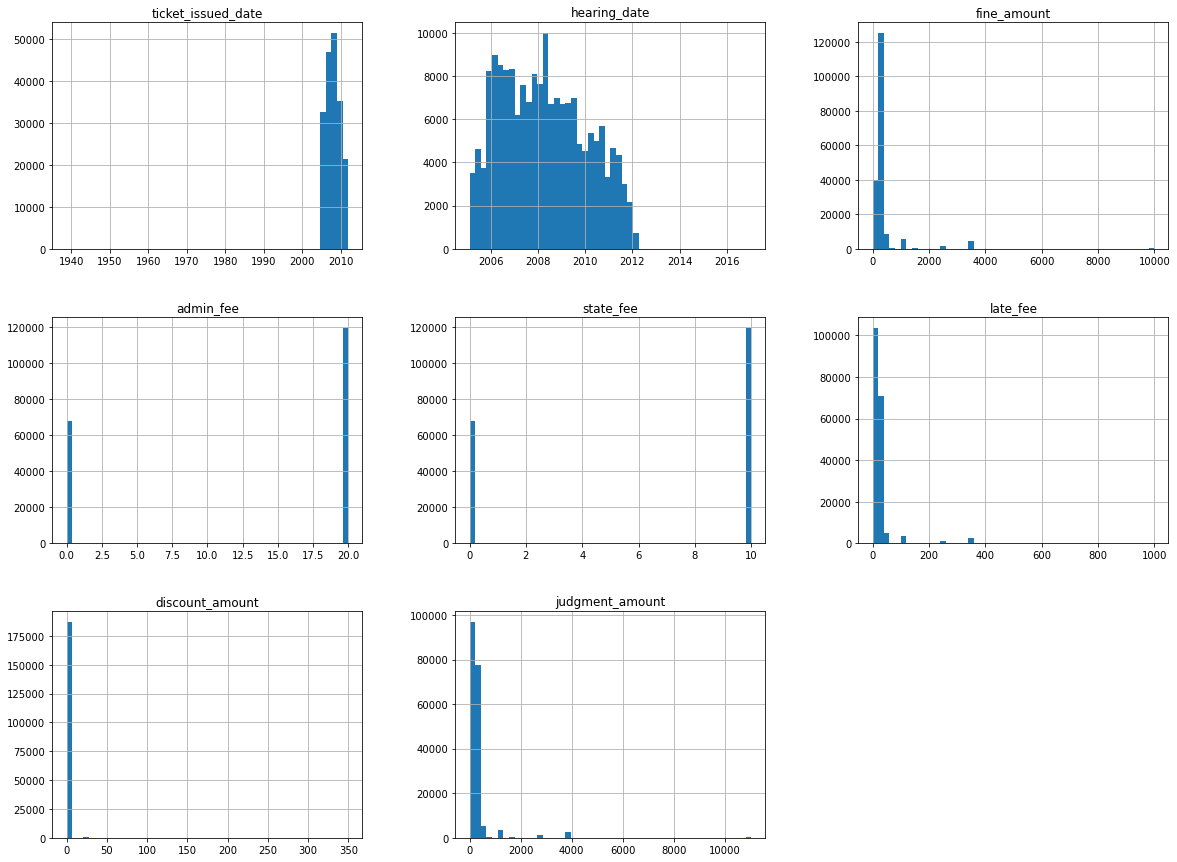

In [34]:
train_set.hist(bins=50, figsize=(20, 15))
plt.show()

In [35]:
train_set.describe()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,judgment_amount
count,187729.000000,187729.000000,187729.000000,187729.000000,187729.000000,187729.000000
mean,374.960012,12.745287,6.372644,21.434865,0.120115,267.787709
std,710.406525,9.615815,4.807907,56.759544,3.223910,629.784201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.000000,20.000000,10.000000,10.000000,0.000000,140.000000
75%,250.000000,20.000000,10.000000,25.000000,0.000000,305.000000
max,10000.000000,20.000000,10.000000,1000.000000,350.000000,11030.000000


# Visualize address data

In [37]:
# merge latlong with addresses, then merge this with y_train
geo_address_data = pd.merge(addresses_data, latlong_data, how="left", on="address").set_index("ticket_id")
geo_train_set = pd.merge(train_set, geo_address_data, left_index=True, right_index=True)

geo_train_set['compliance'] = y_train

(42.2, 42.5)

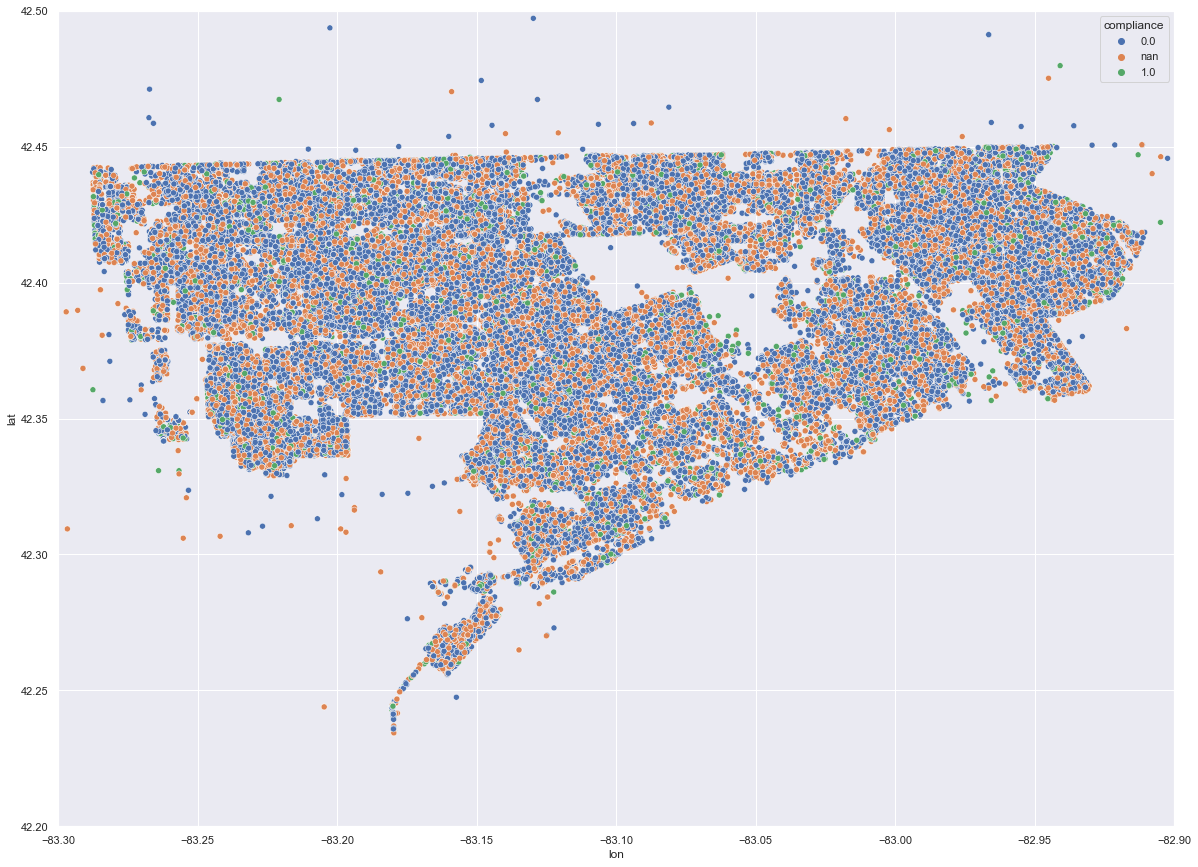

In [80]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20, 15)})

sns.scatterplot(data=geo_train_set,  x="lon", y="lat", hue="compliance")
plt.xlim([-83.3, -82.9])
plt.ylim([42.2, 42.5])

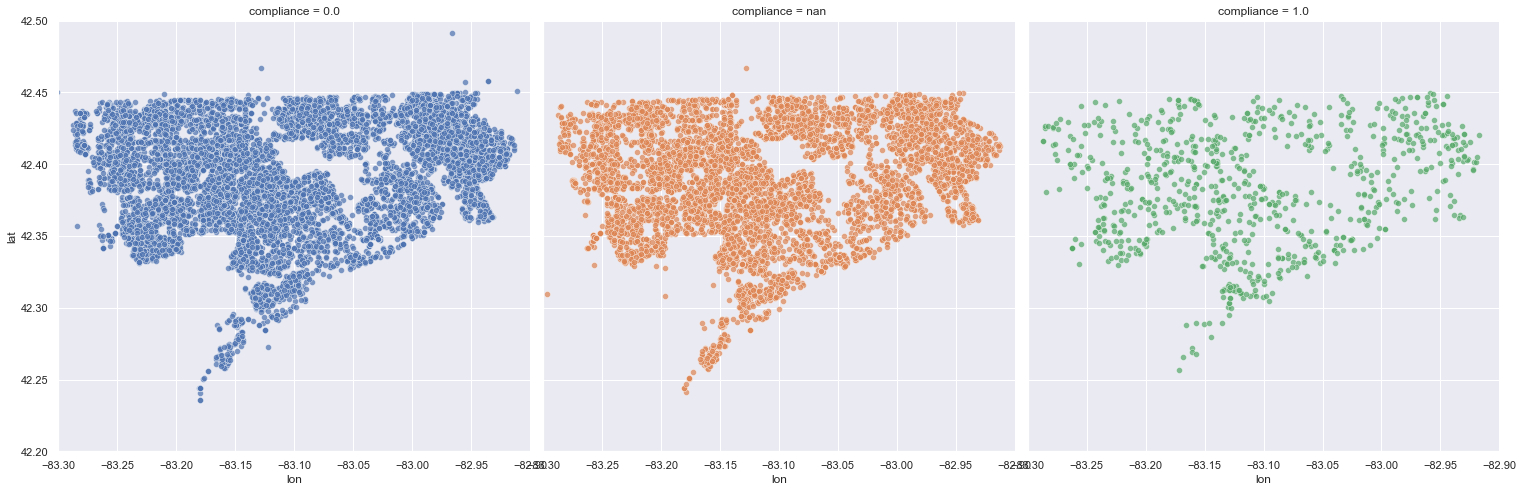

In [99]:
# try using Seaborn to split out the data into a facegrid, with 10% of the data

sample_data = geo_train_set.sample(frac=0.1, replace=False, random_state=1)

g = sns.FacetGrid(sample_data, col="compliance", hue="compliance", height=7)
g.map(sns.scatterplot, "lon", "lat", alpha=.7)
g.set(xlim=(-83.3, -82.9), ylim=(42.2, 42.5))



In [105]:
# find addresses that match geolocation data

violation_address_data = geo_train_set[["violation_street_number", "violation_street_name", "address"]]
violation_address_data['number_match'] = violation_address_data.apply(lambda x: x.violation_street_number in x.address, axis=1)
violation_address_data['street_match'] = violation_address_data.apply(lambda x: x.violation_street_name in x.address, axis=1)

/var/folders/g6/f3k4_8hx0zj8db9mvxdvf4180000gn/T/ipykernel_35962/3506814883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violation_address_data['number_match'] = violation_address_data.apply(lambda x: x.violation_street_number in x.address, axis=1)
/var/folders/g6/f3k4_8hx0zj8db9mvxdvf4180000gn/T/ipykernel_35962/3506814883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violation_address_data['street_match'] = violation_address_data.apply(lambda x: x.violation_street_name in x.address, axis=1)


In [116]:
# step 4: isolate the ones that don't match and remove

to_omit = [violation_address_data[violation_address_data['number_match']==False],
           violation_address_data[violation_address_data['street_match']==False]]

# to_omit is empty, no mismatches for violation locations. Move on to checking mailing addresses ... 

[Empty DataFrame
 Columns: [violation_street_number, violation_street_name, address, number_match, street_match]
 Index: [],
 Empty DataFrame
 Columns: [violation_street_number, violation_street_name, address, number_match, street_match]
 Index: []]

In [147]:
category = []
levels = []
for col in geo_train_set:
    category.append(col)
    levels.append(geo_train_set[col].value_counts().count())
    
category_df = pd.DataFrame({"category": category, "levels": levels})
category_df.sort_values(by="levels")

,category,levels
18,state_fee,2
17,admin_fee,2
25,compliance,3
10,country,5
0,agency_name,5
15,disposition,9
20,discount_amount,13
19,late_fee,35
16,fine_amount,38
21,judgment_amount,51
